# Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
abhi = pd.read_csv("Datathon dataset.csv")


## Data Exploration

In [38]:
print("Return first 5 rows.","\n")
abhi.head()

Return first 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in chennai
0,31-12-2015 21:00,31-12-2015 22:00,01-01-2016 00:00,01-01-2016 01:00,10800
1,31-12-2015 22:00,31-12-2015 23:00,01-01-2016 01:00,01-01-2016 02:00,10431
2,31-12-2015 23:00,01-01-2016 00:00,01-01-2016 02:00,01-01-2016 03:00,10005
3,01-01-2016 00:00,01-01-2016 01:00,01-01-2016 03:00,01-01-2016 04:00,9722
4,01-01-2016 01:00,01-01-2016 02:00,01-01-2016 04:00,01-01-2016 05:00,9599


In [39]:
print("Return last 5 rows.","\n")
abhi.tail()

Return last 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in chennai
52961,31-12-2021 16:00,31-12-2021 17:00,31-12-2021 19:00,31-12-2021 20:00,11447
52962,31-12-2021 17:00,31-12-2021 18:00,31-12-2021 20:00,31-12-2021 21:00,11237
52963,31-12-2021 18:00,31-12-2021 19:00,31-12-2021 21:00,31-12-2021 22:00,10914
52964,31-12-2021 19:00,31-12-2021 20:00,31-12-2021 22:00,31-12-2021 23:00,10599
52965,31-12-2021 20:00,31-12-2021 21:00,31-12-2021 23:00,01-01-2022 00:00,10812


In [40]:
abhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Start time UTC                      52966 non-null  object
 1   End time UTC                        52966 non-null  object
 2   Start time UTC+03:00                52966 non-null  object
 3   End time UTC+03:00                  52966 non-null  object
 4   Electricity consumption in chennai  52966 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [41]:
print(abhi.describe(), "\n")

       Electricity consumption in chennai
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000 



## Feature Extraction


In [20]:
del abhi["Start time UTC"]
del abhi["End time UTC"]
del abhi["Start time UTC+03:00"]
abhi.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in chennai":"Cons"},inplace=True)
print(abhi.head(5))

           DateTime   Cons
0  01-01-2016 01:00  10800
1  01-01-2016 02:00  10431
2  01-01-2016 03:00  10005
3  01-01-2016 04:00   9722
4  01-01-2016 05:00   9599


since we are dealing with time series data we should edite the index from 1 2 3 ... --> DateTime format.

In [21]:
dataset = abhi.copy()

# Extract date and time components
dataset["Month"] = pd.to_datetime(dataset["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(dataset["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(dataset["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(dataset["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(dataset["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(dataset["DateTime"]).dt.day_name()

# Set the index to "DateTime" and convert it to a datetime type
dataset.set_index("DateTime", inplace=True)
dataset.index = pd.to_datetime(dataset.index)



In [10]:
dataset.head()

,Cons,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 02:00:00,10431,1,2016,2016-01-01,02:00:00,53,Friday
2016-01-01 03:00:00,10005,1,2016,2016-01-01,03:00:00,53,Friday
2016-01-01 04:00:00,9722,1,2016,2016-01-01,04:00:00,53,Friday
2016-01-01 05:00:00,9599,1,2016,2016-01-01,05:00:00,53,Friday


In [11]:
print("")
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())


Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


In [12]:
# By assuming week starts on Mondey and ends on Sunday.
# The closest start would be on Monday 4-1-2016
# The closest end would be on sunday 26-12-2021
# So we should omit first 71 rows and last 121 rows.
dataset = dataset[71:-121]
dataset.tail()

,Cons,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2021-12-26 19:00:00,12550,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574,12,2021,2021-12-26,21:00:00,51,Sunday
2021-12-26 22:00:00,12384,12,2021,2021-12-26,22:00:00,51,Sunday
2021-12-26 23:00:00,12044,12,2021,2021-12-26,23:00:00,51,Sunday


## Data Visualizations

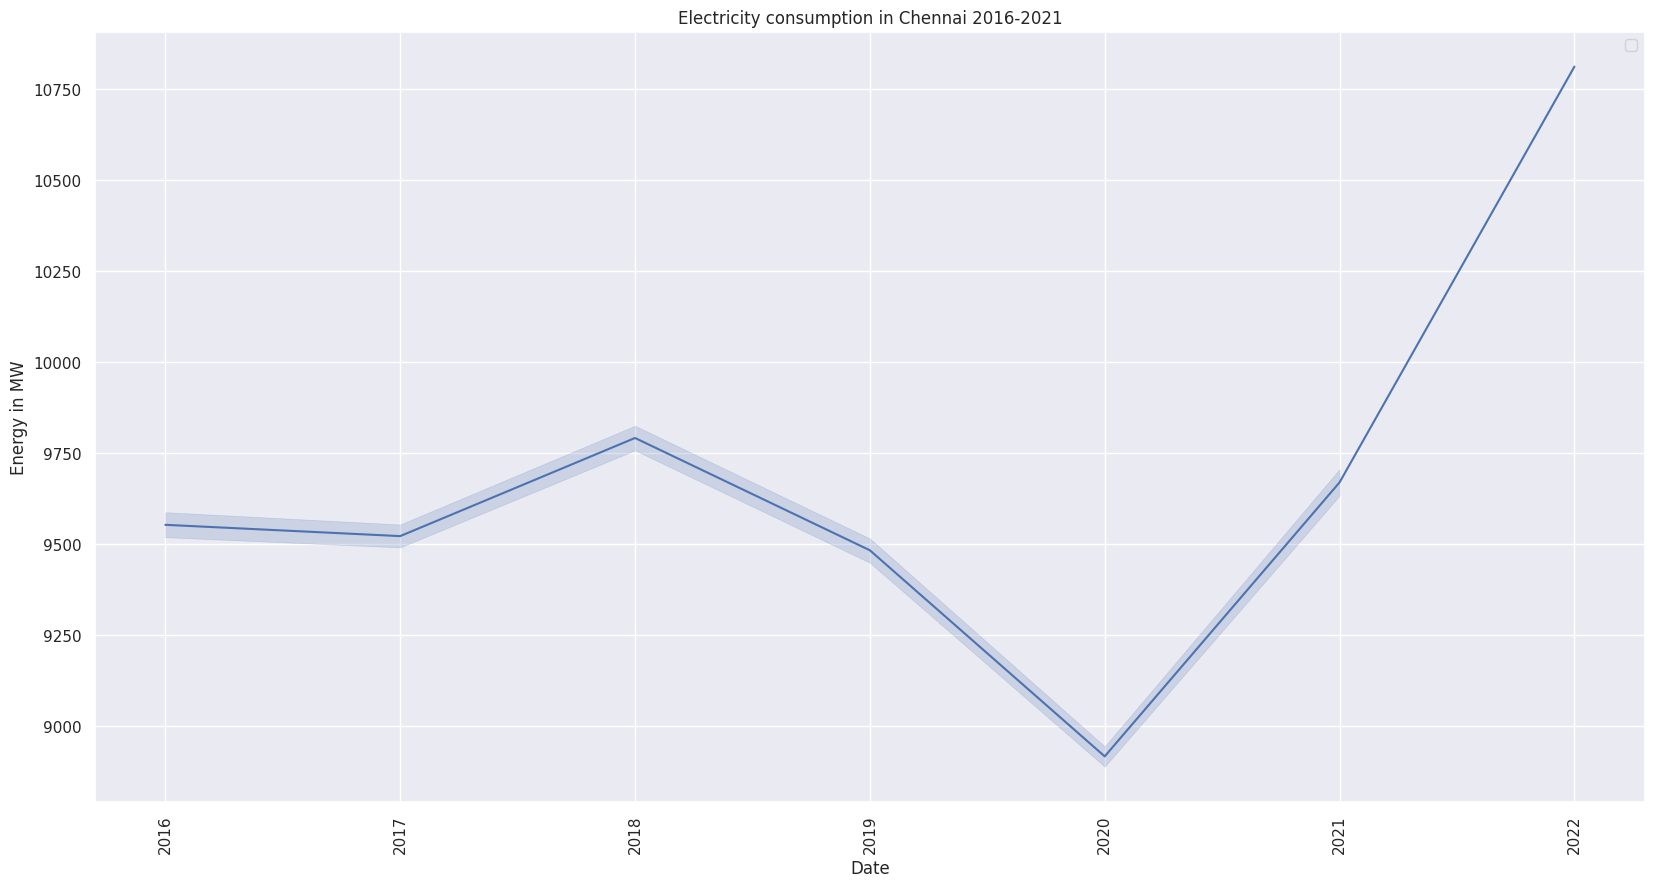

In [30]:
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns

# Rename columns in the dataset DataFrame
abhi.rename(columns={"End time UTC+03:00": "DateTime", "Electricity consumption in chennai": "Cons"})
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Year"], y= dataset["Cons"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption in Chennai 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)



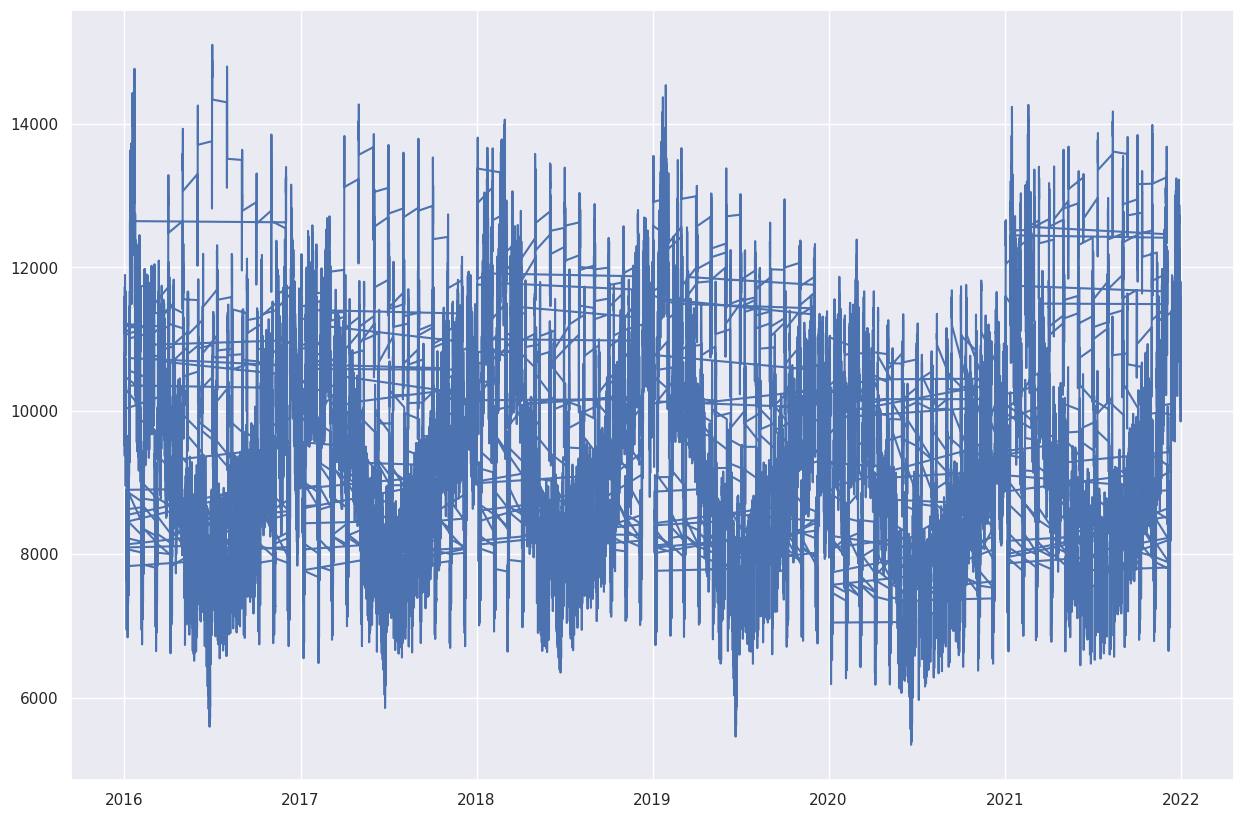

In [31]:
plt.figure(figsize=(15,10))
plt.plot(dataset["Cons"])

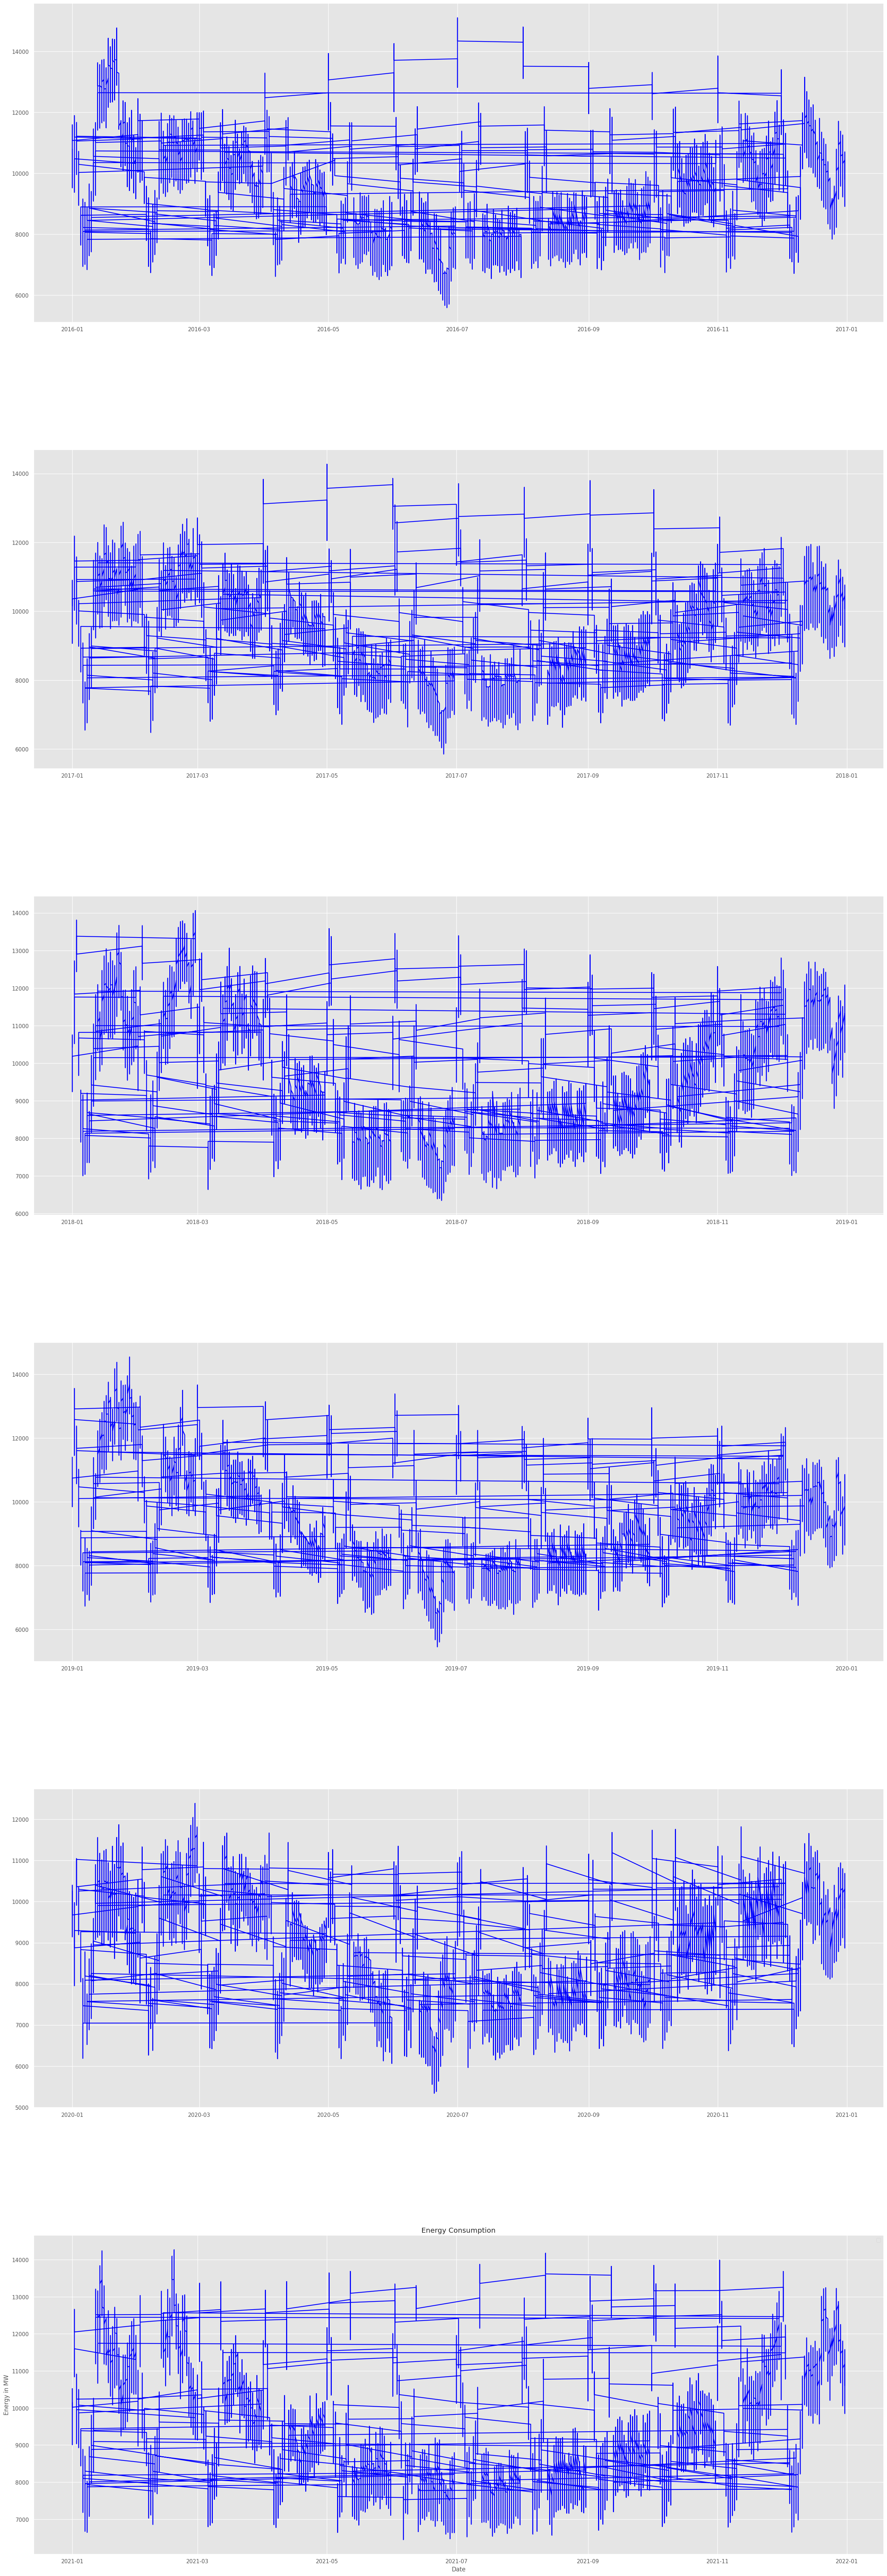

In [33]:
# Energy Consumption Each Year
from matplotlib import style

fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)

style.use("ggplot")

y_2016 = dataset.loc["2016"]["Cons"].to_list()
x_2016 = dataset.loc["2016"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

y_2017 = dataset.loc["2017"]["Cons"].to_list()
x_2017 = dataset.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

y_2018 = dataset.loc["2018"]["Cons"].to_list()
x_2018 = dataset.loc["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

y_2019 = dataset.loc["2019"]["Cons"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = dataset.loc["2020"]["Cons"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = dataset.loc["2021"]["Cons"].to_list()
x_2021 = dataset.loc["2021"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)

plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

<ipython-input-35-90716c9fe5ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Cons"])


Text(0.5, 1.0, 'Energy Distribution')

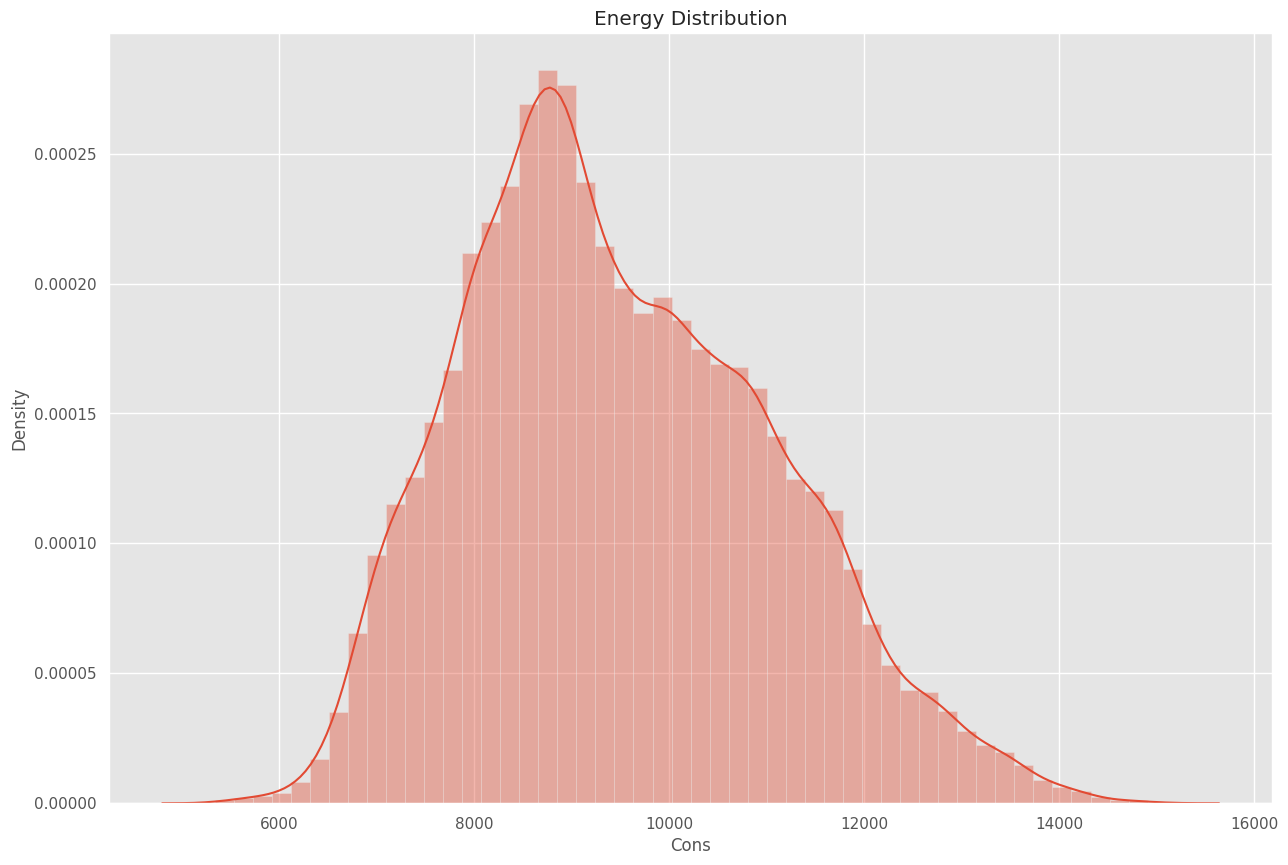

In [35]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Cons"])
plt.title("Energy Distribution")

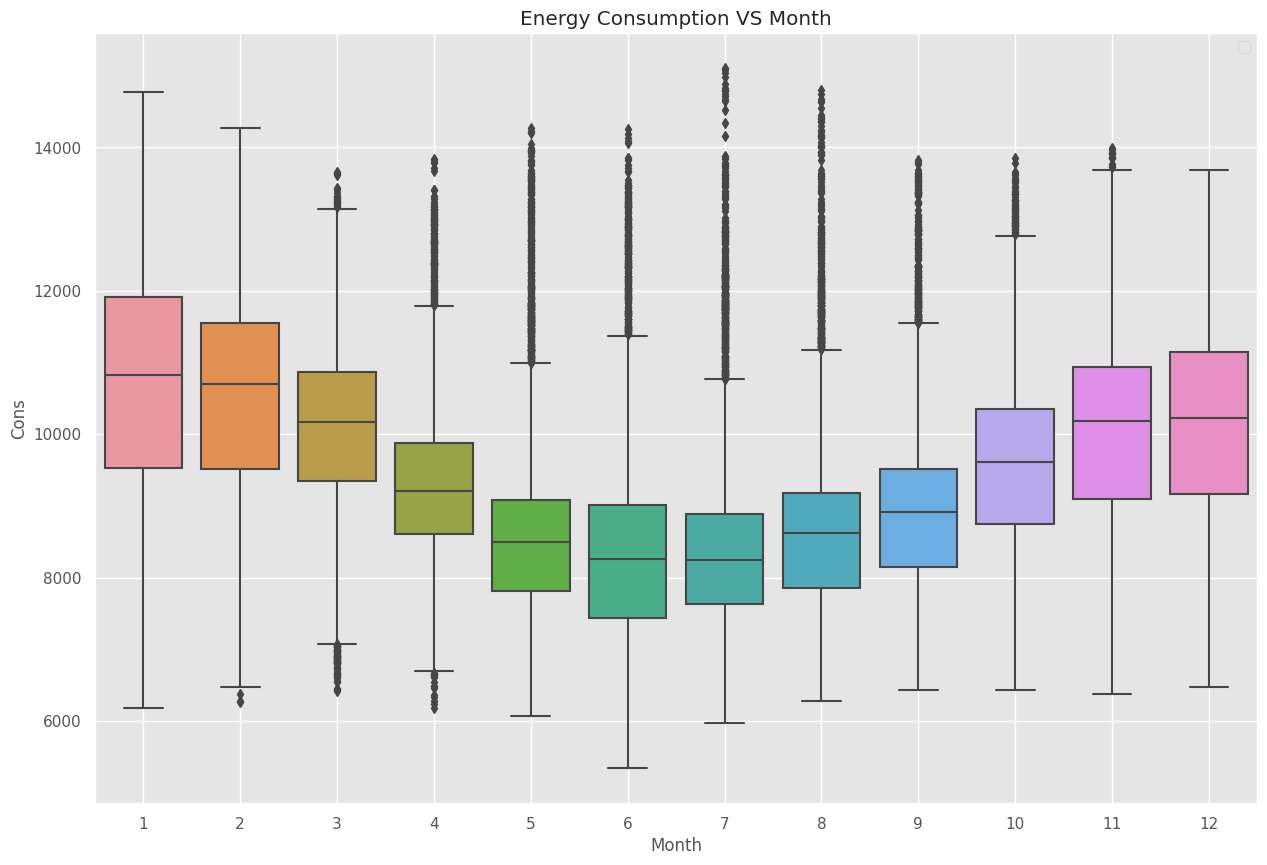

In [38]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset["Month"], y=dataset["Cons"], data= abhi)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

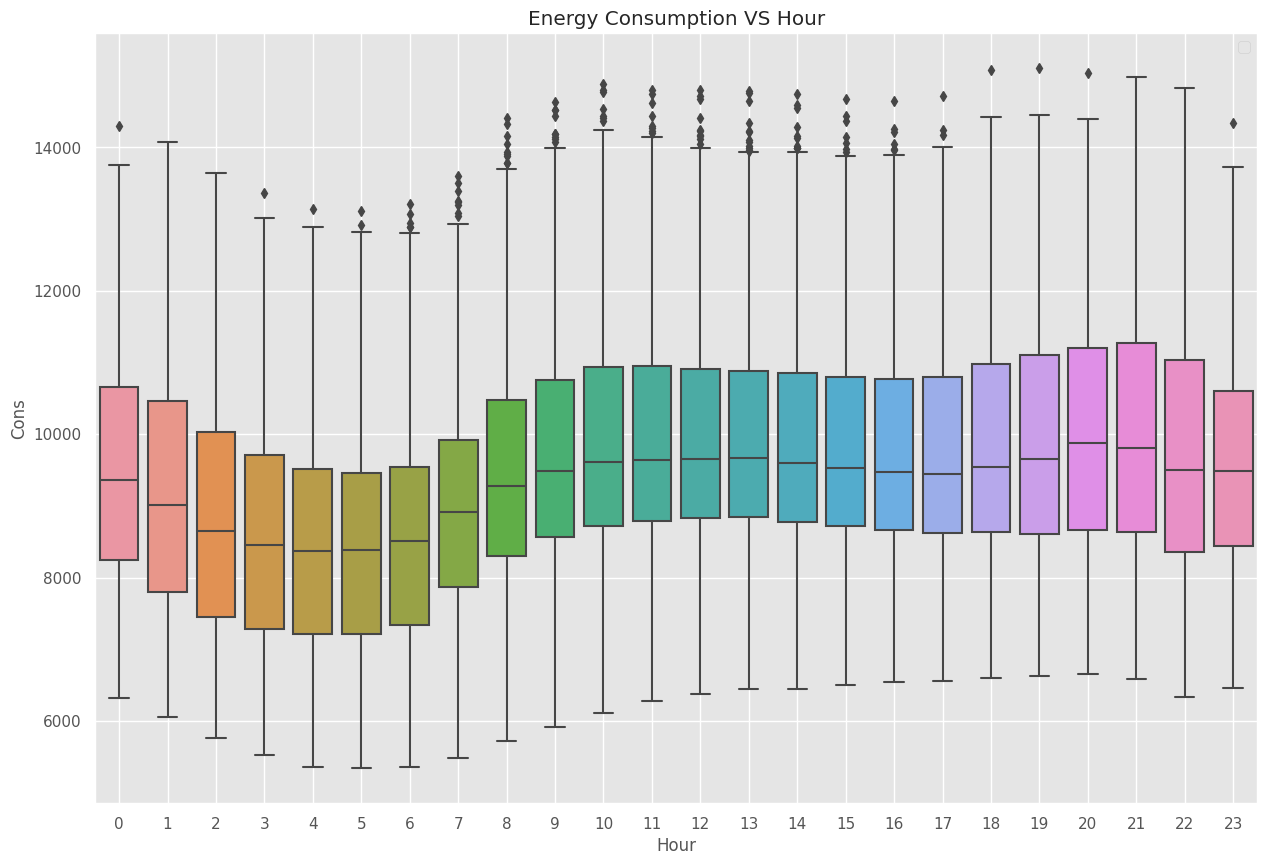

In [40]:
dataset1 = dataset
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset1.index.hour, y=dataset1.Cons, data= abhi)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

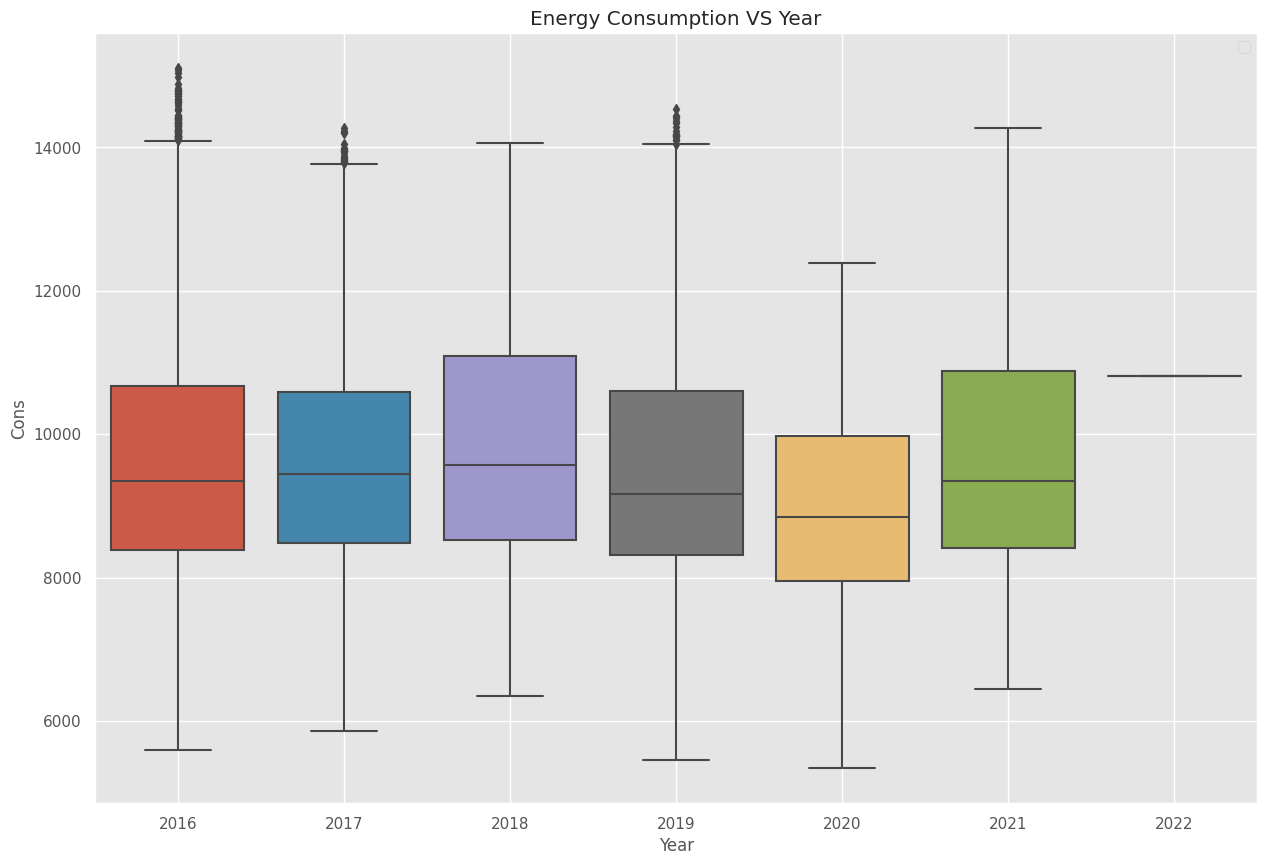

In [43]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset1.index.year, y=dataset1.Cons, data= abhi)
plt.title("Energy Consumption VS Year")
plt.xlabel("Year")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# LSTM Model

## Train, Validation and Test Dataset

In [45]:
# Downsampling involves decreasing the time-frequency of the data
# Downsapling the time-frequency from hours to days
newDataSet = dataset.resample("D").mean(numeric_only=True)

In [46]:
# We have 2193 row
# 2193 - 3 - 6 = 2184 row after omit first two rows and last six ones.
# 2184 / 7 = 312 week
# 312 * 80 %  250 week for train (1750 day)
# 312 - 250 = 62 week for test (434 day)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52966, 7)
New Dataset:  (2193, 4)


In [48]:
newDataSet.head()

,Cons,Month,Year,Week
DateTime,,,,
2016-01-01,10482.695652,1.0,2016.0,53.0
2016-01-02,10968.208333,1.0,2016.0,53.0
2016-01-03,10945.625000,1.0,2016.0,53.0
2016-01-04,10045.458333,1.0,2016.0,1.0
2016-01-05,8045.750000,1.0,2016.0,1.0


In [50]:
y = newDataSet["Cons"]
print(y[0])
y.shape

10482.695652173914


(2193,)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])


Normalizing data before model fitting
[[0.53382758]
 [0.59400888]
 [0.59120959]
 [0.4796302 ]
 [0.23175808]
 [0.26877389]
 [0.26250904]
 [0.24080673]
 [0.31622766]
 [0.26502944]]


In [53]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]


In [55]:
def create_dataset(dataset, time_step=1):
    dataX = [dataset[i:(i + time_step), 0] for i in range(len(dataset) - time_step - 1)]
    dataY = [dataset[i + time_step, 0] for i in range(len(dataset) - time_step - 1)]
    return np.array(dataX), np.array(dataY)



In [58]:
time_step = 100

# Creation datasets for training, testing, and validation
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)


In [60]:
X_train = X_train[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]
X_val = X_val[:, :, np.newaxis]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)



X_train shape: (1303, 100, 1, 1)
X_test shape: (338, 100, 1, 1)
X_val shape: (249, 100, 1, 1)


## Model Structure


In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

# Add the first LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))

model.add(Dropout(0.2))

# Add the second LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth LSTM layer
model.add(LSTM(units=50))

# Add the output layer
model.add(Dense(units=1))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_3 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

## Model Training

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 60 ,batch_size = 20)

Epoch 1/60
66/66 [==============================] - 25s 248ms/step - loss: 0.0376 - val_loss: 0.0202
Epoch 2/60
66/66 [==============================] - 13s 204ms/step - loss: 0.0292 - val_loss: 0.0185
Epoch 3/60
66/66 [==============================] - 15s 231ms/step - loss: 0.0280 - val_loss: 0.0239
Epoch 4/60
66/66 [==============================] - 14s 205ms/step - loss: 0.0261 - val_loss: 0.0138
Epoch 5/60
66/66 [==============================] - 14s 206ms/step - loss: 0.0236 - val_loss: 0.0143
Epoch 6/60
66/66 [==============================] - 14s 205ms/step - loss: 0.0236 - val_loss: 0.0139
Epoch 7/60
66/66 [==============================] - 13s 203ms/step - loss: 0.0226 - val_loss: 0.0165
Epoch 8/60
66/66 [==============================] - 14s 205ms/step - loss: 0.0231 - val_loss: 0.0133
Epoch 9/60
66/66 [==============================] - 20s 301ms/step - loss: 0.0222 - val_loss: 0.0161
Epoch 10/60
66/66 [==============================] - 15s 228ms/step - loss: 0.0232 - val_lo

## Model Evaluating

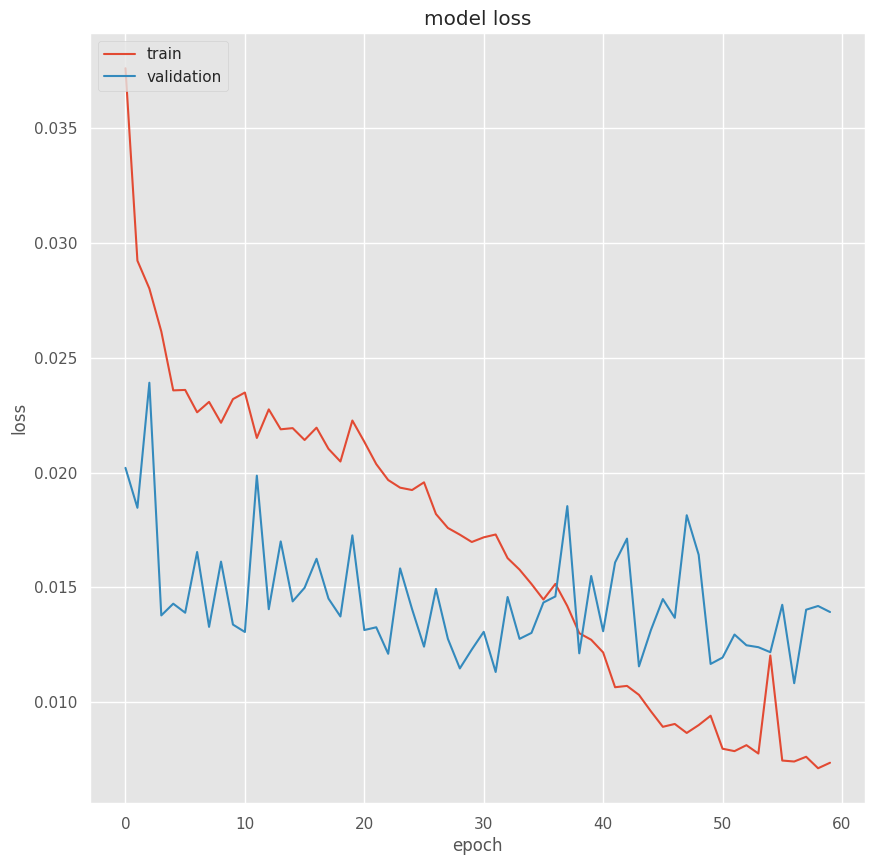

In [68]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [69]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [70]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)


8/8 [==============================] - 1s 84ms/step


In [71]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [72]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.07516668000771434

In [73]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)


(1303, 1)
(338, 1)
(249, 1)
[0.3828464]
(1303,)


# Conclusion

In [74]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

41/41 [==============================] - 2s 51ms/step


,Train Predictions,Actuals
0,[0.3828463852405548],[0.398951554591468]
1,[0.46163493394851685],[0.5874134903419069]
2,[0.4911993443965912],[0.6220763793586849]
3,[0.46617066860198975],[0.40045449850222103]
4,[0.43552035093307495],[0.42624728850325366]
...,...,...
1298,[0.5370994210243225],[0.5347123231071172]
1299,[0.5525725483894348],[0.49934407602520403]
1300,[0.5501685738563538],[0.6857246152256998]
1301,[0.5254375338554382],[0.6140636297903109]


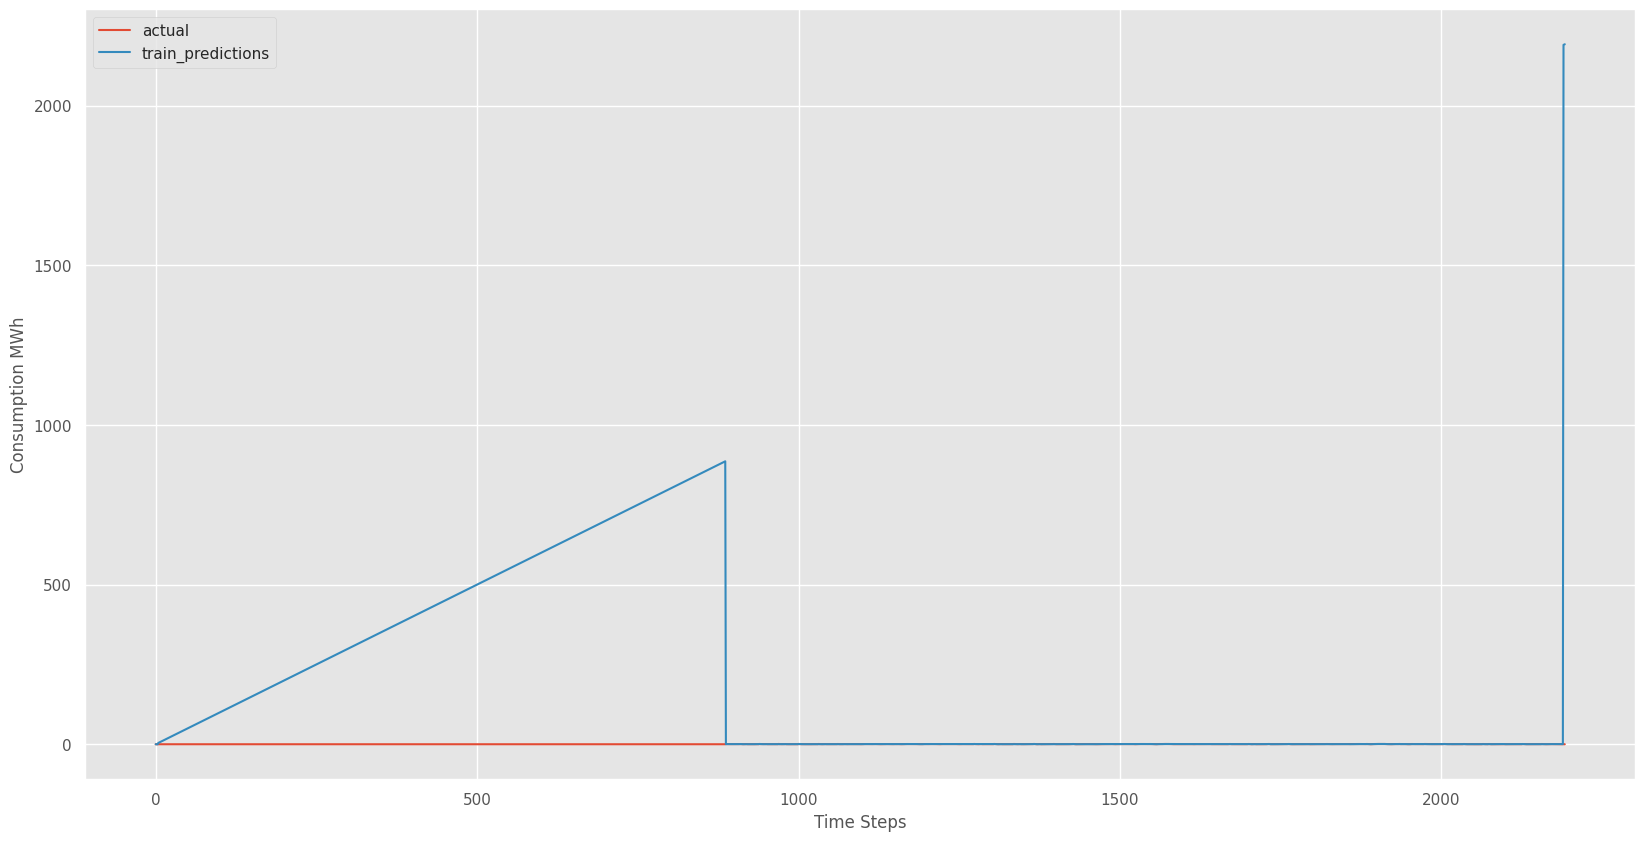

In [76]:
plt.figure(figsize=(20, 10))

# Create NaN arrays of the same shape as y
ActualPlot = np.empty_like(y)

# Set the actual values in the relevant portion of ActualPlot
ActualPlot[887: 887 + len(actual), :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y)
TrainPredictionsPlot[887: 887 + len(train_predictions), :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual', 'train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()


In [77]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results


8/8 [==============================] - 0s 52ms/step


,Val Predictions,Actuals_val
0,[0.4814518690109253],[0.5223840512343766]
1,[0.5402022004127502],[0.5735202974899286]
2,[0.5873769521713257],[0.5258341080466896]
3,[0.6110010743141174],[0.4599163309575457]
4,[0.611713171005249],[0.5028870984402439]
...,...,...
244,[0.42820221185684204],[0.35777295733911785]
245,[0.3708960711956024],[0.3933116413593639]
246,[0.34166795015335083],[0.4028509451502943]
247,[0.3276010751724243],[0.33421134180353274]


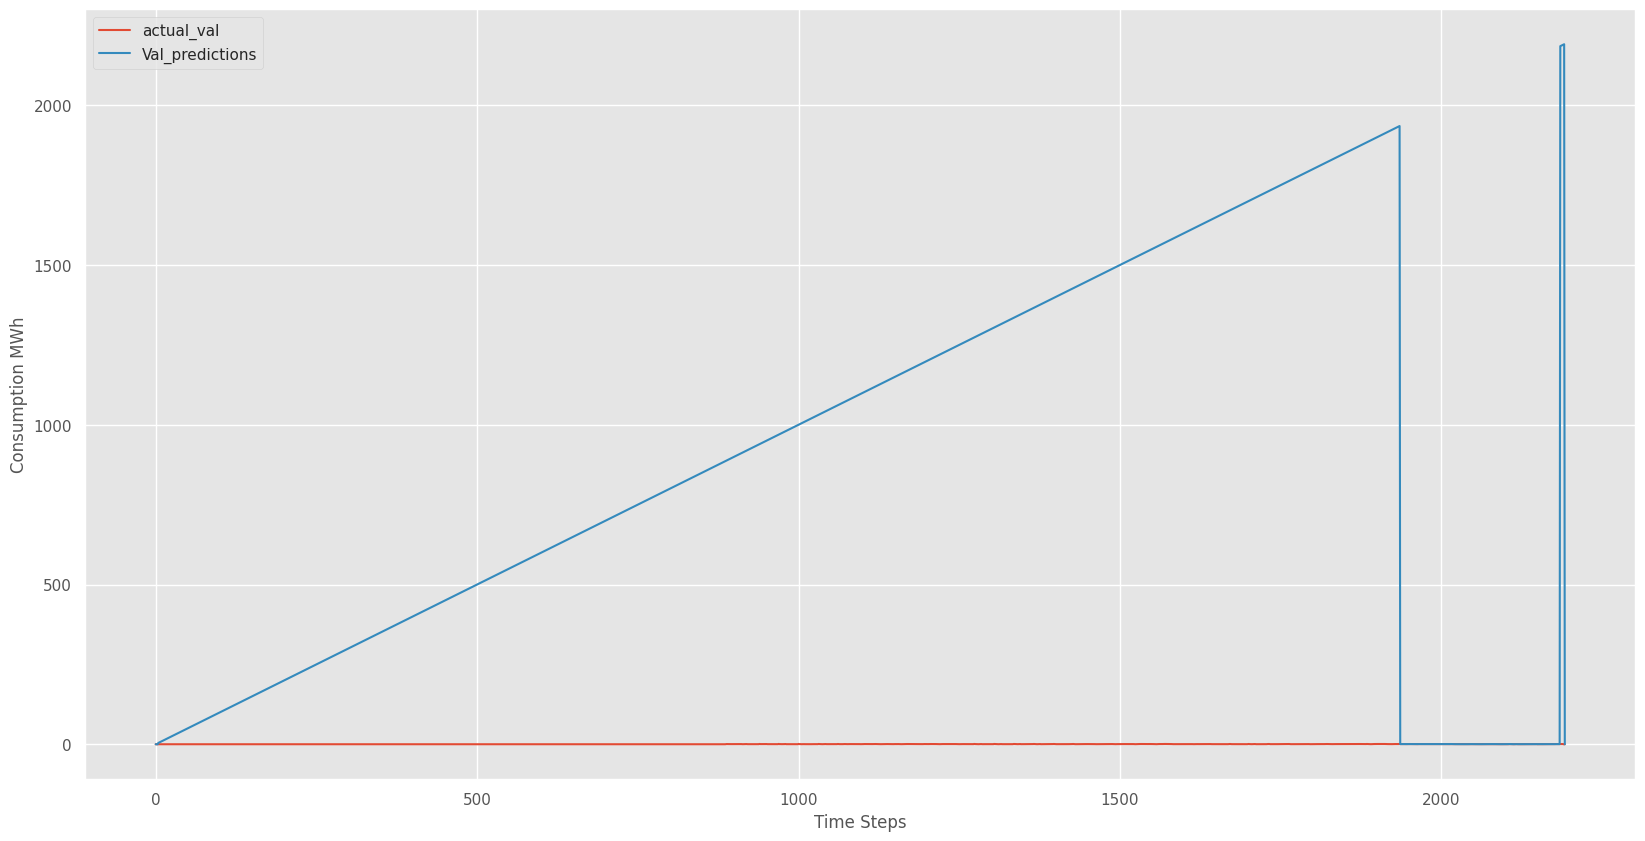

In [79]:
plt.figure(figsize=(20, 10))

# Create NaN arrays of the same shape as y
ActualPlot = np.empty_like(y)

# Set the actual validation values in the relevant portion of ActualPlot
start_index = 1936  # Adjust the start index if needed
end_index = start_index + len(actual_val)
ActualPlot[start_index:end_index, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[start_index:end_index, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val', 'Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()


In [81]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 [==============================] - 1s 47ms/step


,test Predictions,Actuals_test
0,[0.4979713261127472],[0.6261853114347692]
1,[0.5167368650436401],[0.6746513789897738]
2,[0.5412656664848328],[0.6287263712426402]
3,[0.5681616067886353],[0.6114760871810764]
4,[0.5873910784721375],[0.46550459663257937]
...,...,...
333,[0.5132524967193604],[0.7801879971077369]
334,[0.5198817849159241],[0.7704885858898877]
335,[0.5414202213287354],[0.6799814068794546]
336,[0.5785318613052368],[0.6235409565127571]


No charts were generated by quickchart


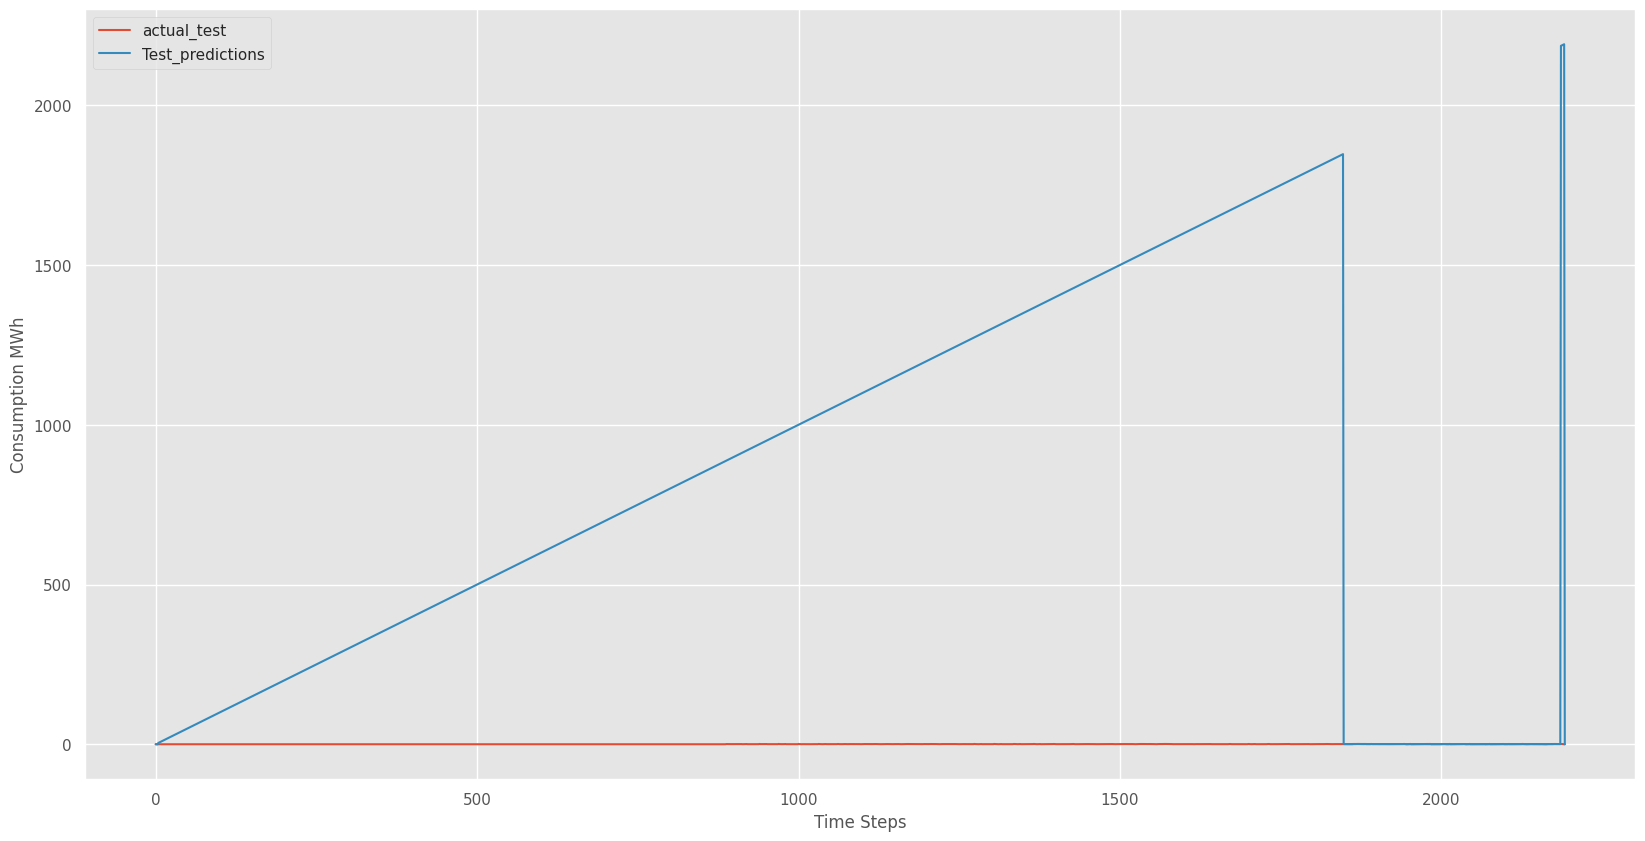

In [83]:
plt.figure(figsize=(20, 10))

# Create NaN arrays of the same shape as y
ActualPlot = np.empty_like(y)

# Set the actual test values in the relevant portion of ActualPlot
start_index = 1848  # Adjust the start index if needed
end_index = start_index + len(actual_test)
ActualPlot[start_index:end_index, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[start_index:end_index, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['actual_test', 'Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()


# Future forecasting

In [88]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

439
[0.45455531]
1404
(1, 102)


In [93]:
# Initial input data (replace this with your actual input data)
temp_input = [0.36948662, 0.37489412, 0.30034604, 0.25916744, 0.35327446, 0.35606342, 0.3529749, 0.36009193, 0.60699824, 0.85361533, 0.7881004, 0.42733705, 0.35562958, 0.23276521, 0.20836174, 0.24789794, 0.28484144, 0.25411631, 0.49454602, 0.80140998]

# Create a list to store the generated output
lst_output = []

# Define the number of time steps and initialize the counter
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) >= n_steps:
        # Prepare the input data for the model
        x_input = np.array(temp_input).reshape(1, n_steps, 1)

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Append the prediction to the output list
        lst_output.extend(yhat.tolist())

        # Move the sliding window
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        i += 1
    else:
        # Handle the case when there's not enough input data
        # You might want to add more data or use a different strategy
        break

print(len(lst_output))


0


2193


ValueError: ignored

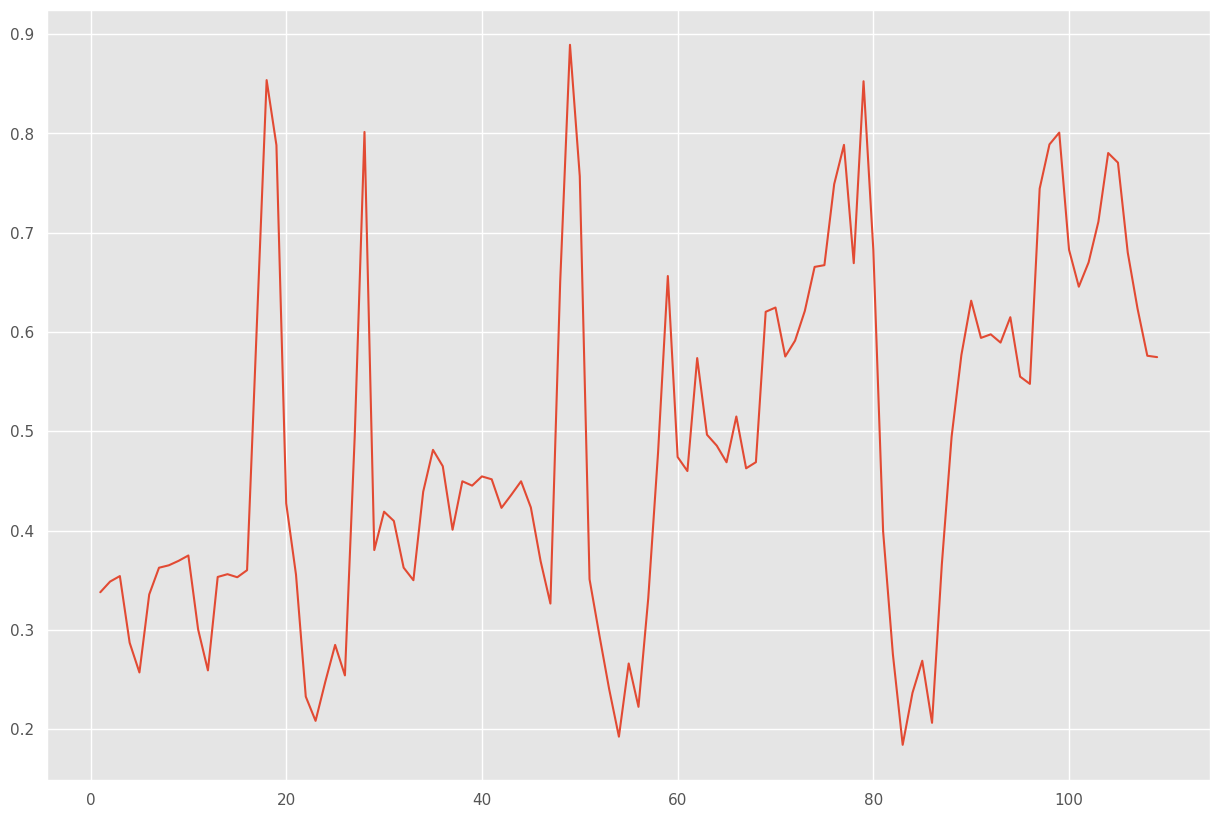

In [96]:
print(len(y))

# Day indices for the actual and predicted data
day_new = np.arange(1, 110)  # Adjust the length to match your data
day_pred = np.arange(110, 140)

plt.figure(figsize=(15, 10))

# Plot the actual data
plt.plot(day_new, scaler.inverse_transform(y[2084:]), label="Actual")

# Plot the predicted data for the next 30 days
plt.plot(day_pred, scaler.inverse_transform(lst_output), label="Predicted")

plt.xlabel("Days")
plt.ylabel("Consumption MWh")
plt.legend()
plt.show()


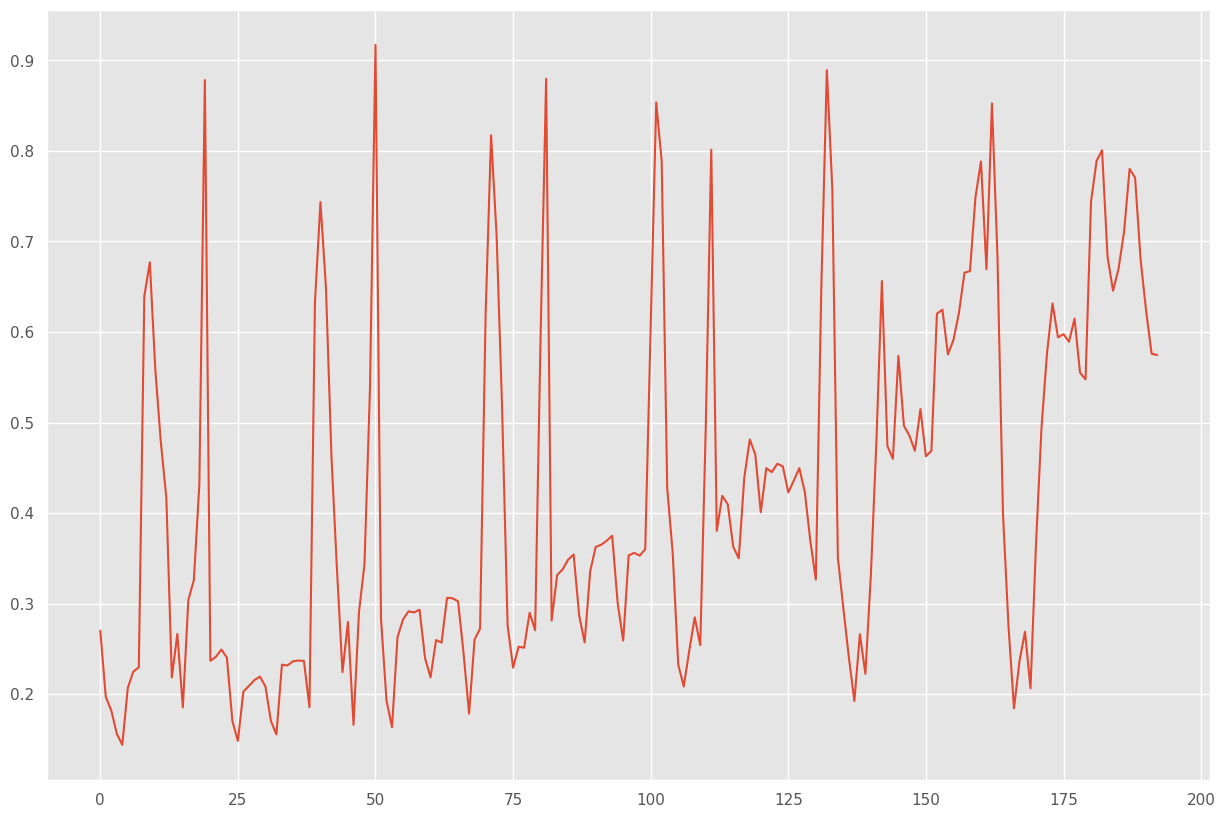

In [97]:
df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])

